In [3]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = "/aiffel/aiffel/camera_sticker/images/"
file_list = [i for i in range(1, 9)]

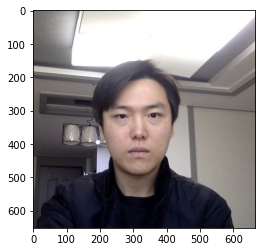

In [204]:
image_bgr = cv2.imread(path + str(file_list[0]) + ".png")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

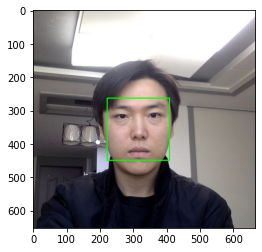

In [205]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rect = detector_hog(image_rgb, 1)

left = dlib_rect[0].left()
right = dlib_rect[0].right()
top = dlib_rect[0].top()
bottom = dlib_rect[0].bottom()

cv2.rectangle(image_rgb, (left, top), (right, bottom), (0, 255, 0), 2, lineType=cv2.LINE_AA)
plt.imshow(image_rgb)
plt.show()

In [206]:
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [207]:
list_landmarks = []

points = landmark_predictor(image_rgb, dlib_rect[0])
list_landmarks = list(map(lambda p: (p.x, p.y), points.parts()))

In [208]:
for point in list_landmarks:
    cv2.circle(image_rgb, point, 2, (0, 100, 100), -1)

317 367
187 186


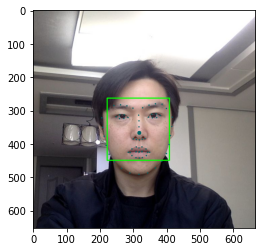

In [209]:
nose_x = list_landmarks[30][0]
nose_y = list_landmarks[30][1]
width = dlib_rect[0].width()
height = bottom - top

print(nose_x, nose_y)
print(width, height)

cv2.circle(image_rgb, (nose_x, nose_y), 6, (0, 100, 100), -1)
plt.imshow(image_rgb)
plt.show()

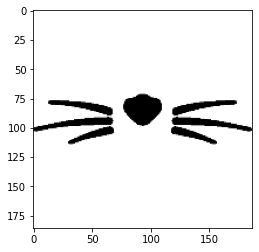

In [210]:
sticker = cv2.imread(path + "cat-whiskers.png", cv2.IMREAD_UNCHANGED)
sticker = cv2.resize(sticker, (width, height))

mask = sticker[:, :, -1]
sticker = sticker[:, :, 0:3]

plt.imshow(sticker)
plt.show()

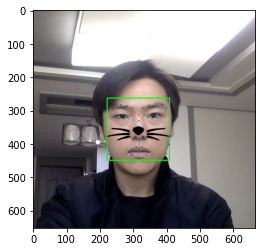

In [211]:
sticker_area = image_rgb[top+int((top/20)):top+int((top/20))+sticker.shape[0], left:left+sticker.shape[1]]
cv2.copyTo(sticker, mask, sticker_area)

plt.imshow(image_rgb)
plt.show()

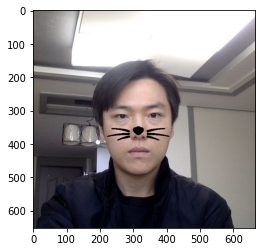

In [212]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
sticker_area = image_rgb[top+int((top/20)):top+int((top/20))+sticker.shape[0], left:left+sticker.shape[1]]

cv2.copyTo(sticker, mask, sticker_area)

plt.imshow(image_rgb)
plt.show()

#  
# 
# 
# 
# 
# 

In [ ]:
path = "/aiffel/aiffel/camera_sticker/images/"
file_list = [i for i in range(1, 9)]

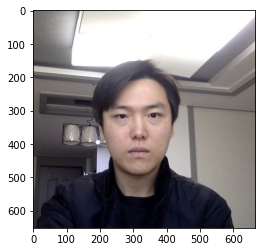

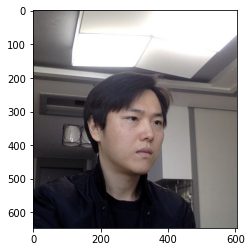

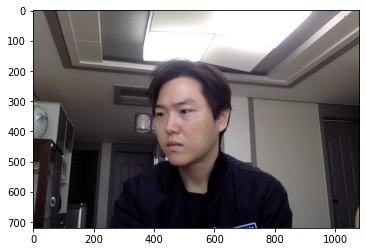

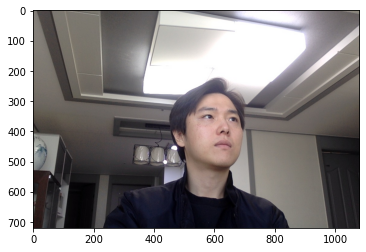

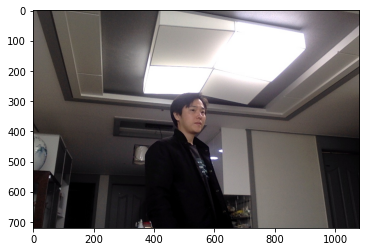

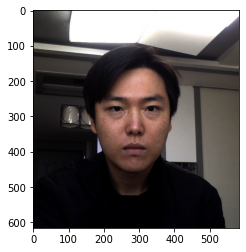

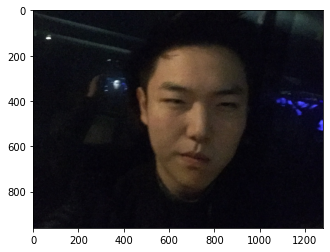

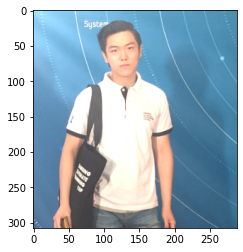

In [217]:
image_bgr = []
image_rgb = []
for i in file_list:
    image_bgr.append(cv2.imread(path + str(i) + ".png"))

for i in range(len(image_bgr)):
    image_rgb.append(cv2.cvtColor(image_bgr[i], cv2.COLOR_BGR2RGB))
    plt.imshow(image_rgb[i])
    plt.show()

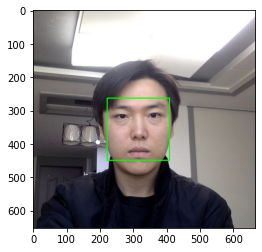

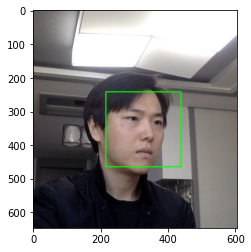

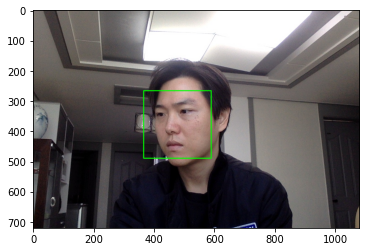

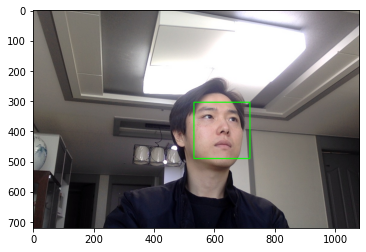

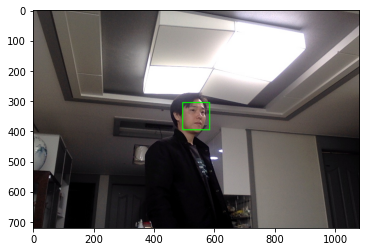

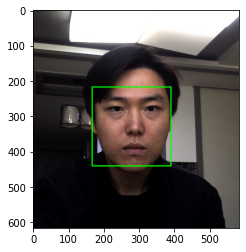

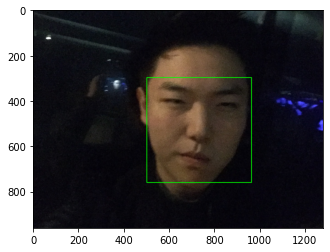

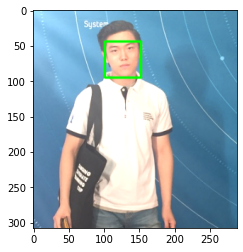

In [219]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = []
left = []
right = []
top = []
bottom = []

for i in range(len(image_rgb)):
    dlib_rects.append(detector_hog(image_rgb[i], 1))
    
for dlib_rect in dlib_rects:
    left.append(dlib_rect[0].left())
    right.append(dlib_rect[0].right())
    top.append(dlib_rect[0].top())
    bottom.append(dlib_rect[0].bottom())

for i in range(len(image_rgb)):
    cv2.rectangle(image_rgb[i], (left[i], top[i]), (right[i], bottom[i]), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    plt.imshow(image_rgb[i])
    plt.show()

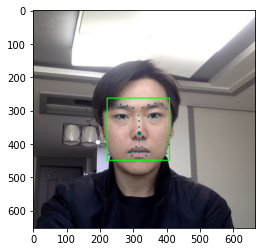

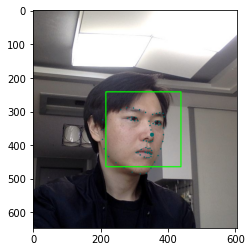

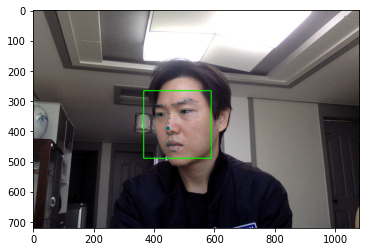

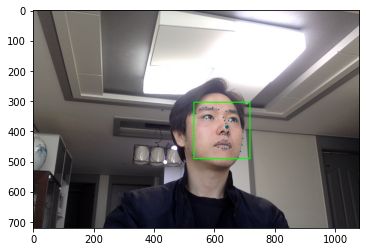

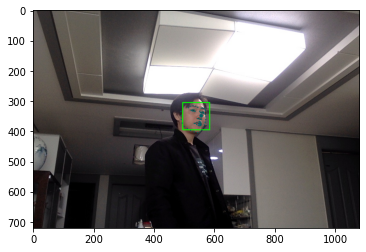

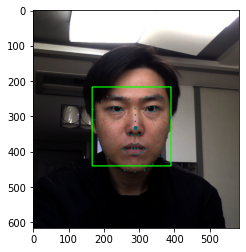

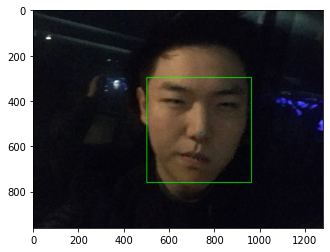

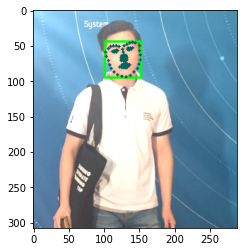

In [224]:
nose_x = []
nose_y = []
width = []
height = []
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for i in range(len(image_rgb)):
    points = landmark_predictor(image_rgb[i], dlib_rects[i][0])
    list_landmarks.append(list(map(lambda p: (p.x, p.y), points.parts())))

for i in range(len(list_landmarks)):
    for point in list_landmarks[i]:
        cv2.circle(image_rgb[i], point, 2, (0, 100, 100), -1)
      
    nose_x.append(list_landmarks[i][30][0])
    nose_y.append(list_landmarks[i][30][1])
    width.append(dlib_rects[i][0].width())
    height.append(bottom[i] - top[i])

    cv2.circle(image_rgb[i], (nose_x[i], nose_y[i]), 6, (0, 100, 100), -1)
    plt.imshow(image_rgb[i])
    plt.show()

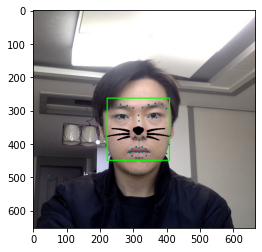

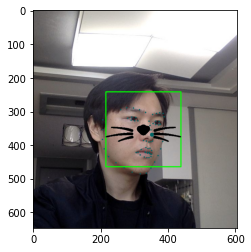

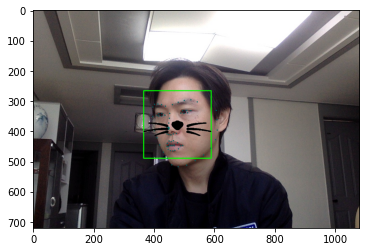

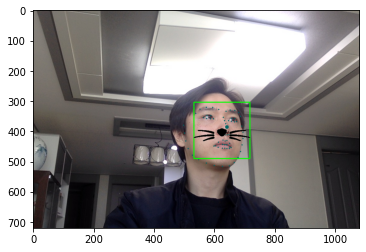

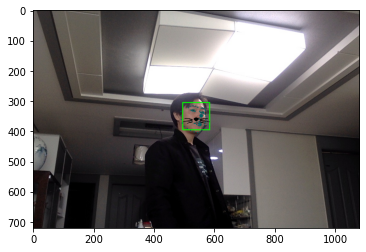

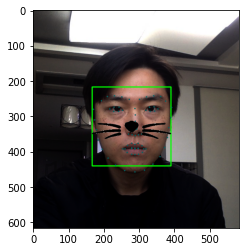

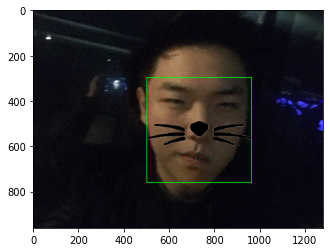

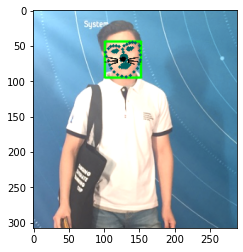

In [227]:
sticker = cv2.imread(path + "cat-whiskers.png", cv2.IMREAD_UNCHANGED)
stickers = []
for i in range(len(file_list)):
    stickers.append(cv2.resize(sticker, (width[i], height[i])))

for i in range(len(file_list)):
    mask = stickers[i][:, :, -1]
    sticker = stickers[i][:, :, 0:3]
    sticker_area = image_rgb[i][top[i]+int((top[i]/20)):top[i]+int((top[i]/20))+sticker.shape[0], left[i]:left[i]+sticker.shape[1]]
    cv2.copyTo(sticker, mask, sticker_area)
    
    plt.imshow(image_rgb[i])
    plt.show()

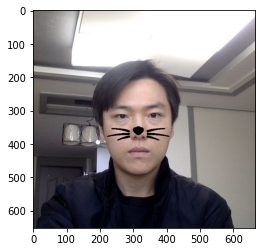

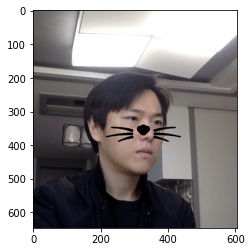

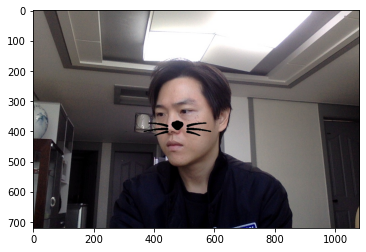

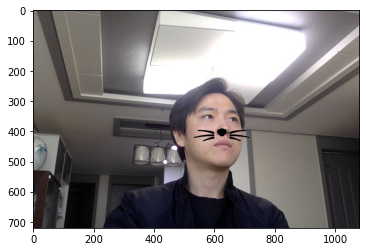

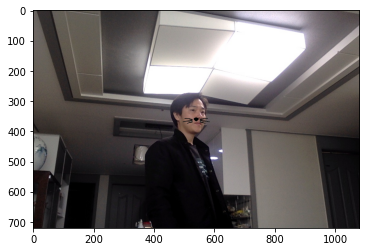

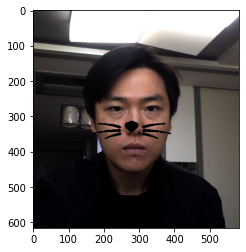

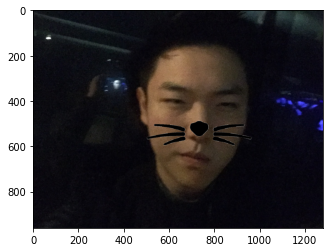

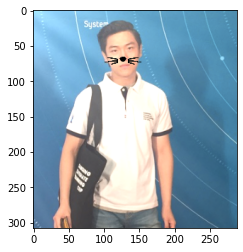

In [229]:
for i in range(len(file_list)):
    image = cv2.cvtColor(image_bgr[i], cv2.COLOR_BGR2RGB)
    
    mask = stickers[i][:, :, -1]
    sticker = stickers[i][:, :, 0:3]
    sticker_area = image[top[i]+int((top[i]/20)):top[i]+int((top[i]/20))+sticker.shape[0], left[i]:left[i]+sticker.shape[1]]

    cv2.copyTo(sticker, mask, sticker_area)

    plt.imshow(image)
    plt.show()

## 결론

### OpenCV face dectator를 사용하여 사진에서 얼굴을 캡쳐하고 dlib의 shape_predictor로 눈, 눈썹, 코, 입술, 턱선을 마스킹해보았습니다. 그 중 코를 기준으로 하여 고양이수염 스티커를 붙여 보았습니다. 
### 정면사진, 고개를 돌린 사진, 거리를 떨어트려 찍은 사진, 어두운 사진, 배경이 시커먼 사진, 밝은 사진들 다양한 옵션이 들어간 이미지에 대해서 캡쳐와 마스킹을 하고 스티커를 붙였습니다.
### 회전, 거리, 조도, 명도등의 가능한 모든 변수에 대해 face dectator와 shape_predictor는 큰 영향이 없이 명확하게 작동하였습니다.
### 따라서 스티커를 붙이는 함수 역시 대부분의 변수에 대해 정상적으로 작동하였으나 회전에 대해서는 명령을 주지 않았기 때문에 이를 이미지에 적절히 반영하지 못했습니다.
### dlib의 landmark의 수평쌍(1-17, 2-16, ... , 32-36, 33-35, ... , 49-55, 61-65)등을 이용하여 z축의 회전각을 구할 수 있고, 수직쌍(28-29-30-31, 52-63-67-58)을 이용하여 x축, y축의 회전각을 구할 수 있으므로 이를 이용하여 스티커를 회전시킬 수 있을 것 같습니다.
### 다만, 이부분까지는 굳이 구현하지는 않았습니다. 필요하다면 추후에 구해보는 것도 좋을 것 같습니다.
### 오늘은 스티커가 정상적으로 이미지에 붙는지 여부만 확인해 보았습니다.